1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

%matplotlib inline

__Задача:__ предсказание баллов ЕГЭ ученика

In [73]:
def calc_mse(y, y_pred):
    return (np.mean((y - y_pred)**2))


def standard_scale(X):
    return ((X - X.mean()) / X.std())

In [74]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])
y = np.array([45, 55, 50, 55, 60, 35, 75, 80, 50, 60])

In [88]:
X_st = X.copy().astype(np.float64)
 
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st.size, X_st

(40,
 array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
        [ 1.        , -0.70710678, -0.56713087, -0.89625816],
        [ 1.        , -0.35355339, -0.46401617,  0.38411064],
        [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
        [ 1.        ,  0.        ,  0.97958969,  0.38411064],
        [ 1.        , -1.06066017, -0.36090146, -0.89625816],
        [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
        [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
        [ 1.        , -0.70710678, -1.08270439, -0.89625816],
        [ 1.        , -0.35355339,  0.05155735,  0.38411064]]))

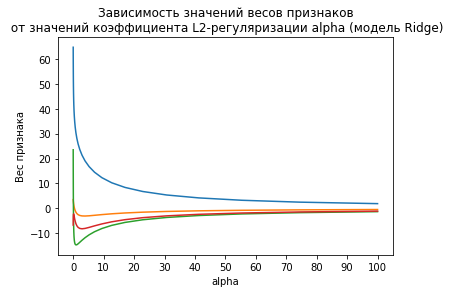

In [93]:
train_amount = int( X_st.size / 10 )
train_X = X_st[:train_amount]
train_y = y[:train_amount]
test_X = X_st[train_amount:]
test_y = y[train_amount:]

coeffs = np.zeros(( X_st.size, train_X.shape[1]))
alpha_list = np.logspace(-3, 2,  X_st.size)

for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val, fit_intercept=False)
    ridge.fit(train_X, train_y)
    
    coeffs[i, :] = ridge.coef_.flatten()

for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Зависимость значений весов признаков\n от значений коэффициента L2-регуляризации alpha (модель Ridge)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака');


2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [100]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())


def standard_scale(X):
    return ((X - X.mean()) / X.std())

In [101]:
X_norm = X.copy().astype(np.float64)
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])

X_st = X.copy().astype(np.float64) 
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])


In [99]:
X, X_st, X_norm

(array([[   1,    1,  500,    1],
        [   1,    1,  700,    1],
        [   1,    2,  750,    2],
        [   1,    5,  600,    1],
        [   1,    3, 1450,    2],
        [   1,    0,  800,    1],
        [   1,    5, 1500,    3],
        [   1,   10, 2000,    3],
        [   1,    1,  450,    1],
        [   1,    2, 1000,    2]]),
 array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
        [ 1.        , -0.70710678, -0.56713087, -0.89625816],
        [ 1.        , -0.35355339, -0.46401617,  0.38411064],
        [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
        [ 1.        ,  0.        ,  0.97958969,  0.38411064],
        [ 1.        , -1.06066017, -0.36090146, -0.89625816],
        [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
        [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
        [ 1.        , -0.70710678, -1.08270439, -0.89625816],
        [ 1.        , -0.35355339,  0.05155735,  0.38411064]]),
 array([[1.        , 0.1       , 0.0

In [116]:
X_norm_st = X_norm.copy().astype(np.float64)
X_norm_st[:, 1] = standard_scale(X_norm_st[:, 1])
X_norm_st[:, 2] = standard_scale(X_norm_st[:, 2])
X_norm_st[:, 3] = standard_scale(X_norm_st[:, 3])
X_norm_st, X_st

(array([[ 1.00000000e+00, -7.07106781e-01, -9.79589689e-01,
         -8.96258160e-01],
        [ 1.00000000e+00, -7.07106781e-01, -5.67130873e-01,
         -8.96258160e-01],
        [ 1.00000000e+00, -3.53553391e-01, -4.64016169e-01,
          3.84110640e-01],
        [ 1.00000000e+00,  7.07106781e-01, -7.73360281e-01,
         -8.96258160e-01],
        [ 1.00000000e+00, -1.96261557e-16,  9.79589689e-01,
          3.84110640e-01],
        [ 1.00000000e+00, -1.06066017e+00, -3.60901465e-01,
         -8.96258160e-01],
        [ 1.00000000e+00,  7.07106781e-01,  1.08270439e+00,
          1.66447944e+00],
        [ 1.00000000e+00,  2.47487373e+00,  2.11385144e+00,
          1.66447944e+00],
        [ 1.00000000e+00, -7.07106781e-01, -1.08270439e+00,
         -8.96258160e-01],
        [ 1.00000000e+00, -3.53553391e-01,  5.15573521e-02,
          3.84110640e-01]]),
 array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
        [ 1.        , -0.70710678, -0.56713087, -0.89625816],
    

In [119]:
X_st_norm = X_st.copy().astype(np.float64)
X_st_norm[:, 1] = min_max_scale(X_st_norm[:, 1])
X_st_norm[:, 2] = min_max_scale(X_st_norm[:, 2])
X_st_norm[:, 3] = min_max_scale(X_st_norm[:, 3])
X_st_norm, X_norm

(array([[1.        , 0.1       , 0.03225806, 0.        ],
        [1.        , 0.1       , 0.16129032, 0.        ],
        [1.        , 0.2       , 0.19354839, 0.5       ],
        [1.        , 0.5       , 0.09677419, 0.        ],
        [1.        , 0.3       , 0.64516129, 0.5       ],
        [1.        , 0.        , 0.22580645, 0.        ],
        [1.        , 0.5       , 0.67741935, 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 0.1       , 0.        , 0.        ],
        [1.        , 0.2       , 0.35483871, 0.5       ]]),
 array([[1.        , 0.1       , 0.03225806, 0.        ],
        [1.        , 0.1       , 0.16129032, 0.        ],
        [1.        , 0.2       , 0.19354839, 0.5       ],
        [1.        , 0.5       , 0.09677419, 0.        ],
        [1.        , 0.3       , 0.64516129, 0.5       ],
        [1.        , 0.        , 0.22580645, 0.        ],
        [1.        , 0.5       , 0.67741935, 1.        ],
        [1. 

Вывод: не имеет смысла применять и стандартизацию, и нормализацию к одним и тем же признакам.

3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации. (!Такой функции в уроке не было. Беру задание из прилагающейся методички!)
   
   Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [120]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) 
        dReg = reg * (W / np.abs(W)) 
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [121]:
gradient_descent_reg_l1(X_st, y, iterations=5000)

Iter: 0, weights: [ 0.91168319 -0.0694062  -1.28360277 -0.73042177], error 3299.9102440426564
Iter: 500, weights: [ 6.20211399  1.0255503  -0.1942438   0.39358584], error 2666.053747620309
Iter: 1000, weights: [10.98904586  1.87707691  0.63544193  1.26327654], error 2163.564853010055
Iter: 1500, weights: [15.32039762  2.54076335  1.26508725  1.93695554], error 1761.9464450132218
Iter: 2000, weights: [19.23952756  3.05946772  1.74065957  2.45956682], error 1438.9414183943722
Iter: 2500, weights: [22.78566751  3.46623342  2.09759193  2.86575453], error 1177.9387779139831
Iter: 3000, weights: [25.99431554  3.78653777  2.3631967   3.18222296], error 966.2963351886843
Iter: 3500, weights: [28.8975913   4.04002535  2.55852621  3.42955578], error 794.232729035196
Iter: 4000, weights: [31.52455757  4.24184433  2.69980712  3.62361848], error 654.077934745655
Iter: 4500, weights: [33.90151117  4.40367649  2.79954613  3.77663946], error 539.7533168668417
Final MSE: 446.4016059301537


array([36.04815585,  4.53429567,  2.8672732 ,  3.89782707])